In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.subplots as sp
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [27]:
df=pd.read_csv('F:\House Data\housing.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
df.index += 1

In [29]:
df['date'] = pd.to_datetime(df['date'])

In [30]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
df.dtypes

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [34]:
df['bathrooms'].isnull().sum()

10

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 1 to 21613
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     21613 non-null  int64         
 1   id             21613 non-null  int64         
 2   date           21613 non-null  datetime64[ns]
 3   price          21613 non-null  float64       
 4   bedrooms       21600 non-null  float64       
 5   bathrooms      21603 non-null  float64       
 6   sqft_living    21613 non-null  int64         
 7   sqft_lot       21613 non-null  int64         
 8   floors         21613 non-null  float64       
 9   waterfront     21613 non-null  int64         
 10  view           21613 non-null  int64         
 11  condition      21613 non-null  int64         
 12  grade          21613 non-null  int64         
 13  sqft_above     21613 non-null  int64         
 14  sqft_basement  21613 non-null  int64         
 15  yr_built       2161

In [9]:
df.drop(['id','Unnamed: 0'],axis=1, inplace=True)
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [10]:
#df.drop(['id','Unnamed: 0'],axis=1, inplace=True)
#df.describe()

In [11]:
#def insert_hyphens(s):
#    return s[:4] + '-' + s[4:6] + '-' + s[6:8]

#df['data'] = df['data'].apply(insert_hyphens)

In [12]:
df.nunique()

date              372
price            4028
bedrooms           12
bathrooms          29
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [13]:
df['price_mln'] = df['price'].apply(lambda x: x/1000000)

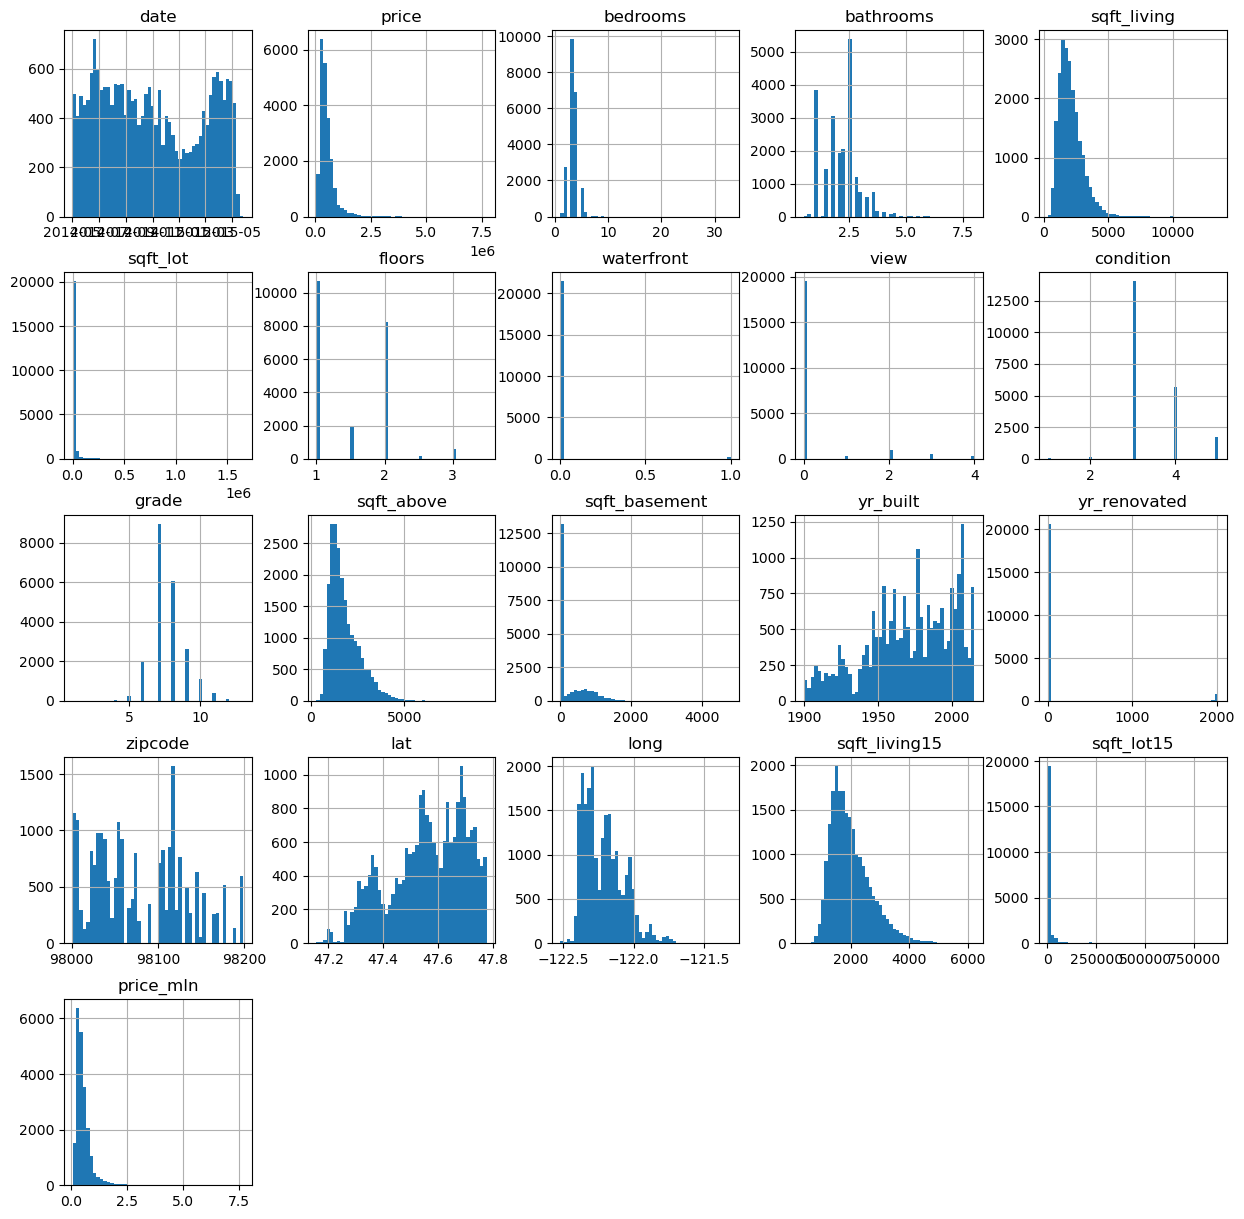

In [16]:
df.hist(bins=50,figsize=(15,15))
plt.show()

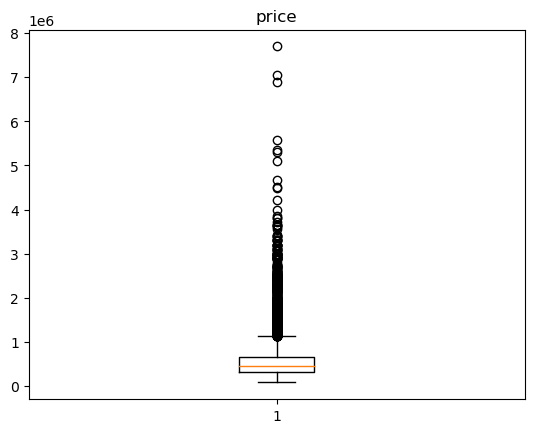

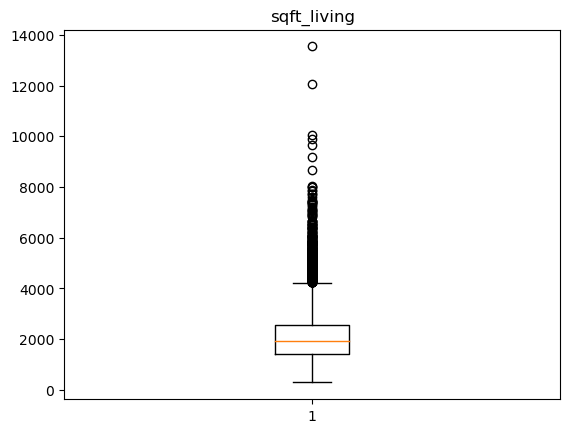

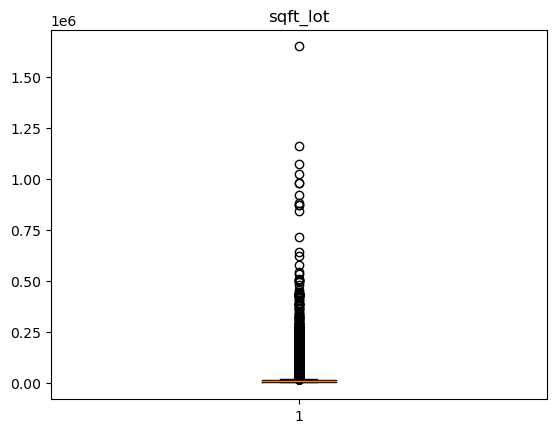

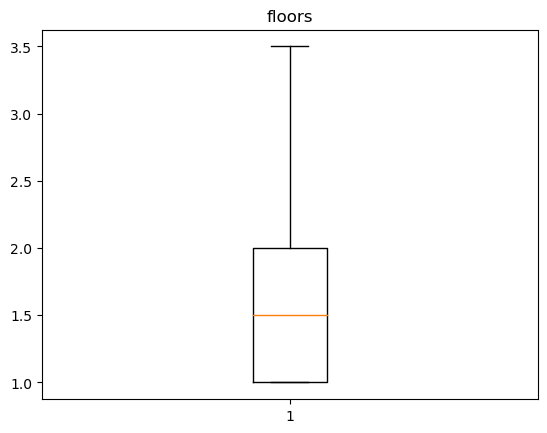

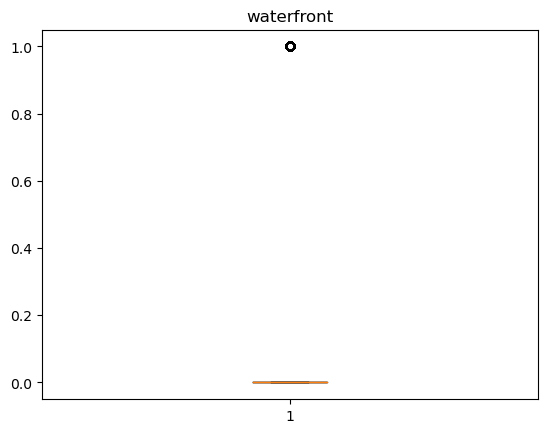

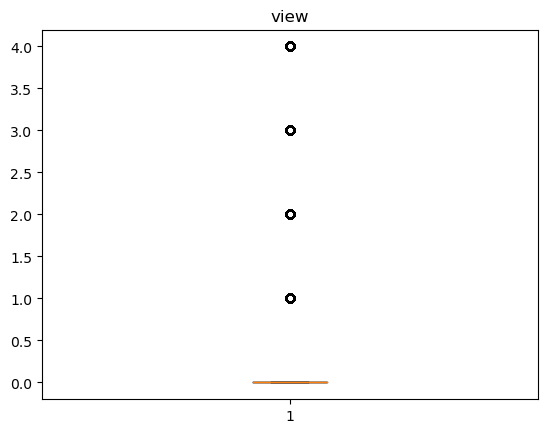

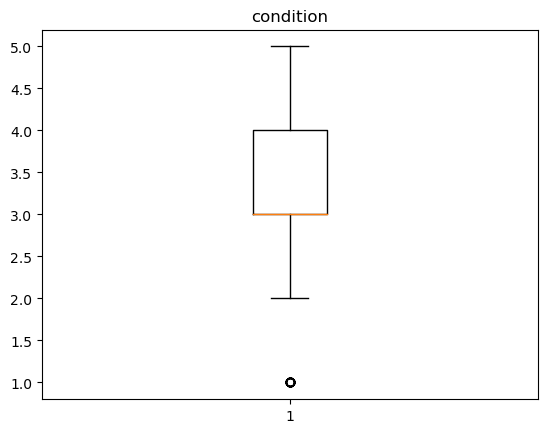

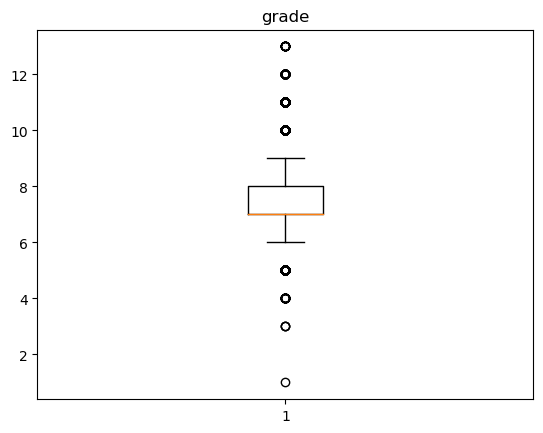

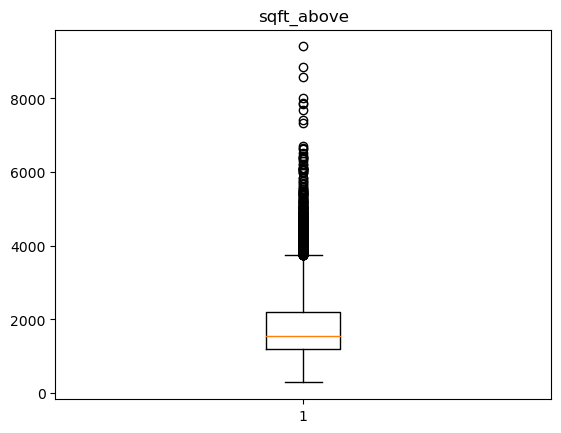

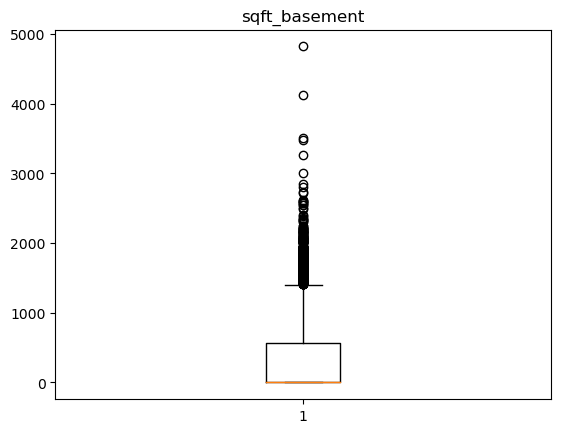

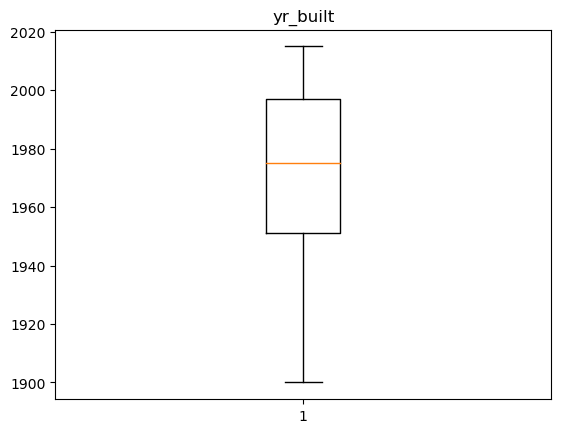

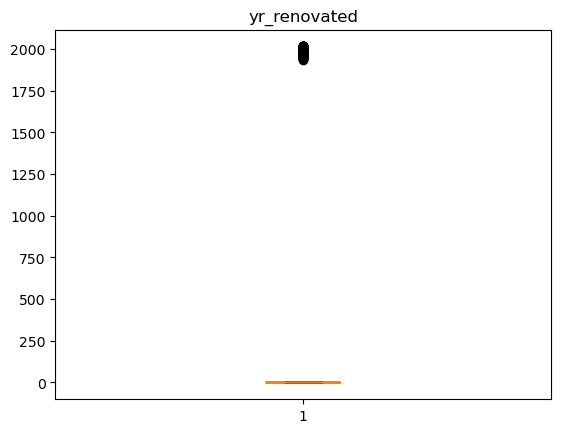

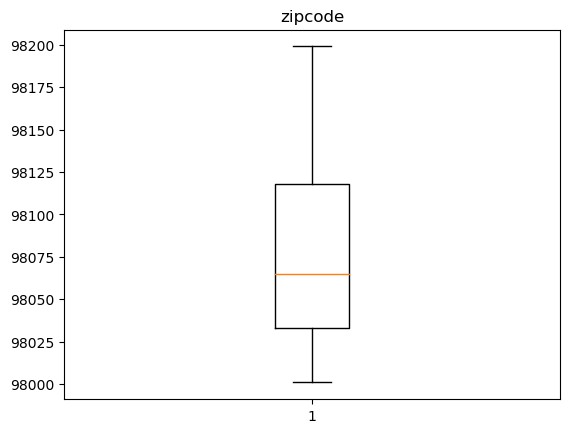

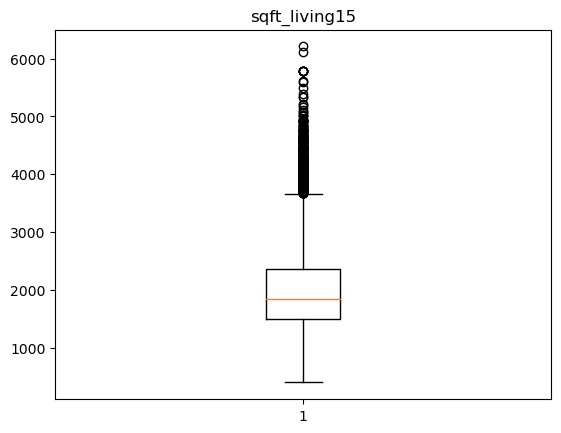

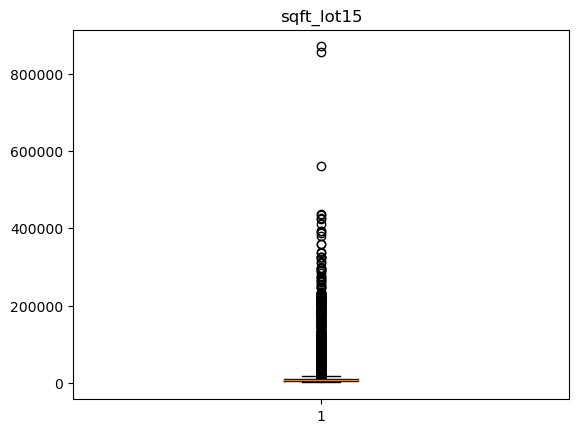

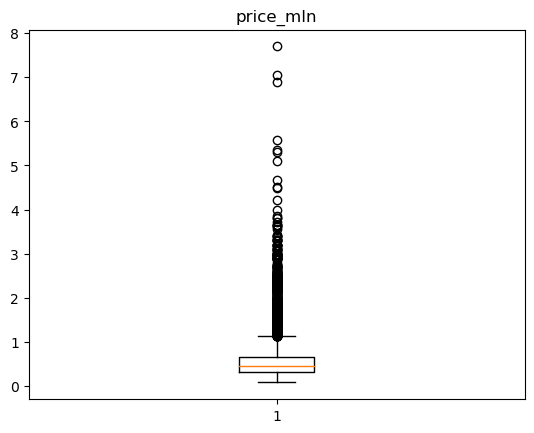

In [120]:
def checking_outliers_boxplot(dataframe):
    for col in dataframe.columns:
        plt.boxplot(dataframe[col])
        plt.title(col)
        plt.show()


df1=df.drop(['date','lat','long','bedrooms','bathrooms'],axis=1)
checking_outliers_boxplot(df1)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



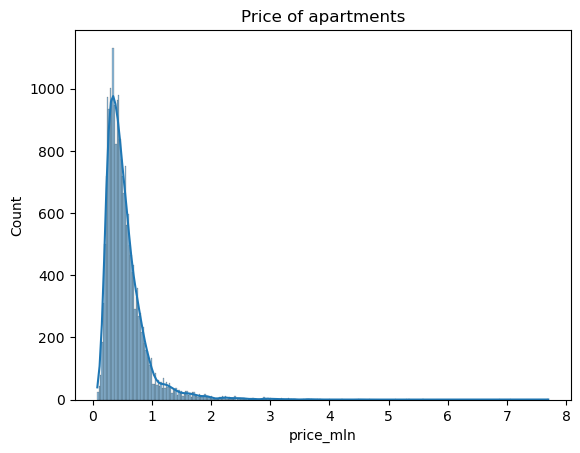

In [128]:
sns.histplot(df['price_mln'], kde=True).set(title='Price of apartments')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



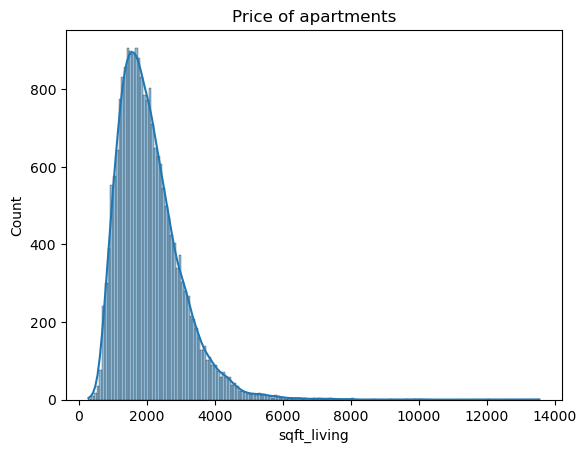

In [129]:
sns.histplot(df['sqft_living'], kde=True).set(title='Price of apartments')
plt.show()

<Axes: xlabel='price', ylabel='sqft_living'>

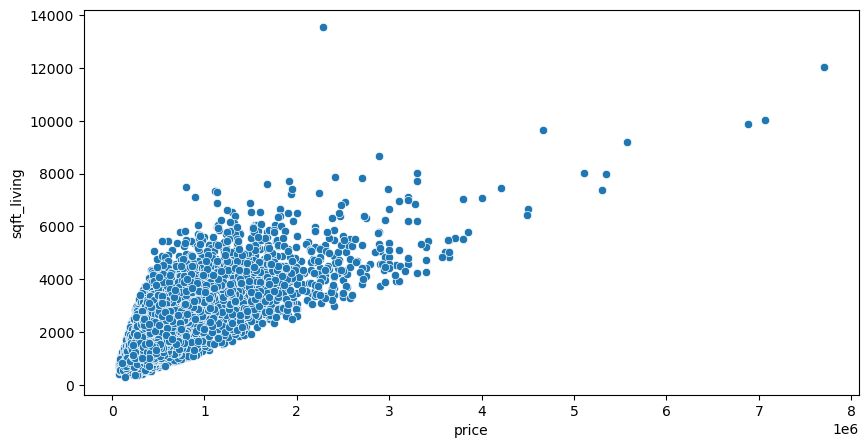

In [130]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

<Axes: xlabel='bedrooms', ylabel='count'>

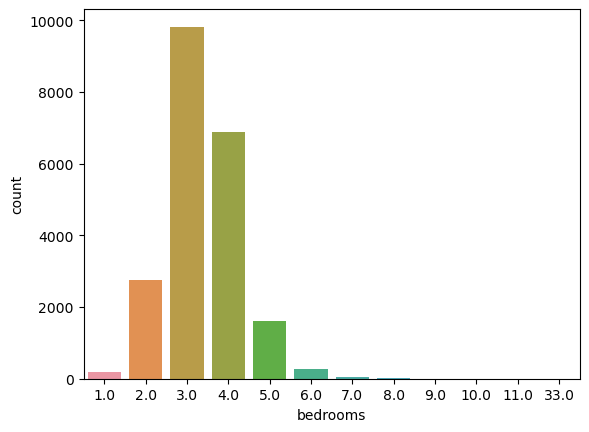

In [131]:
sns.countplot(data=df,x='bedrooms')

<Axes: xlabel='bathrooms', ylabel='count'>

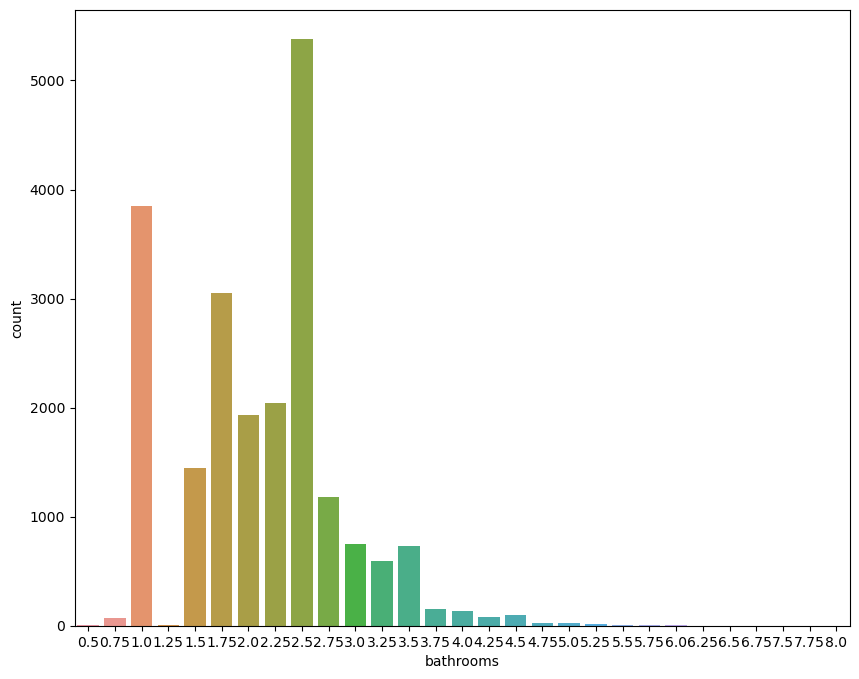

In [133]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='bathrooms')


<Axes: xlabel='bedrooms', ylabel='price'>

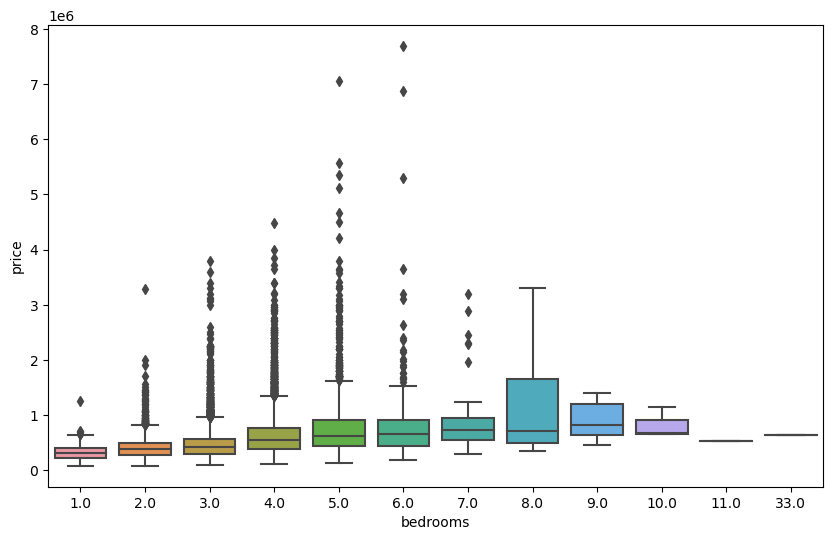

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='bedrooms',y='price')

In [118]:
df.corr(numeric_only=True)['price'].sort_values().to_frame()

,price
zipcode,-0.053203
long,0.021626
condition,0.036362
yr_built,0.054012
sqft_lot15,0.082447
sqft_lot,0.089661
yr_renovated,0.126434
floors,0.256794
waterfront,0.266369
lat,0.307003


<Axes: >

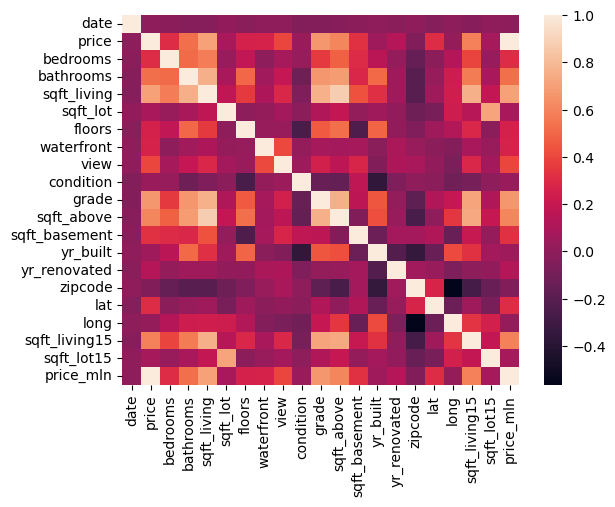

In [18]:
sns.heatmap(df.corr())

In [19]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.4928532179037931

In [40]:
df.dropna(subset=['bedrooms', 'bathrooms'], inplace=True)


In [41]:
df2=df[["floors", "waterfront","bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]

df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
features =["floors", "waterfront","bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y= df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

0.5963176169666173